## Underworld2 Parallel Notebook Execution

### Key points to remember
1. The domain is decomposed across processes!
2. The mesh determines the decomposition.
3. Mesh decomposition is static. 
4. Swarm decomposition may changes due to particle advection.

### Underworld2 Parallel Domain Decomposition

In [1]:
# The following is required to launch parallel notebooks
# Also an ipcluster needs to be started.  This might be 
# possible via the 'IPython Clusters' tab in your Jupyter
# Notebook browser, or from the command linen using:
# `ipcluster start -n 4 --profile=mpi`

import ipyparallel as ipp
rc = ipp.Client(profile="mpi")
view = rc[:]
# Also need to use the following ipython 'magic' 
# so that all following cells are run parallel
%autopx

%autopx enabled


In [ ]:
# # create a parallel mesh 
import underworld as uw
import glucifer
mesh = uw.mesh.FeMesh_Cartesian(elementRes=(45,32))

[output:0]

<IPython.core.display.Javascript object>

[output:1]

<IPython.core.display.Javascript object>

[output:2]

<IPython.core.display.Javascript object>

[output:3]

<IPython.core.display.Javascript object>

[output:4]

<IPython.core.display.Javascript object>

[output:5]

<IPython.core.display.Javascript object>

[output:6]

<IPython.core.display.Javascript object>

[output:7]

<IPython.core.display.Javascript object>

In [ ]:
#let's check out local element counts
print 'proc=', uw.rank(), ' elementsLocal=', mesh.elementsLocal

[stdout:0] proc= 0  elementsLocal= 368
[stdout:1] proc= 3  elementsLocal= 352
[stdout:2] proc= 2  elementsLocal= 368
[stdout:3] proc= 1  elementsLocal= 352


### Underworld2 Mesh Decomposition

In [ ]:
# now add a variable
meshvar = uw.mesh.MeshVariable(mesh,1)
# set the mesh variable to the processor rank!
# note that the numpy view is only to local data!
meshvar.data[:] = uw.rank()

[output:0]


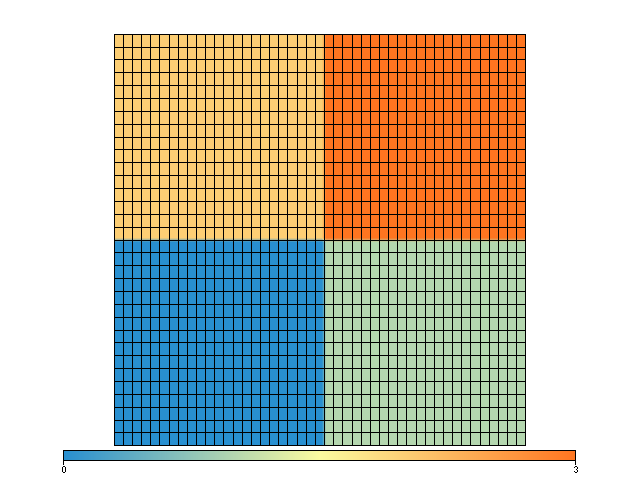

In [ ]:
# viz!
fig = glucifer.Figure()
fig.append(glucifer.objects.Surface(mesh,meshvar))
fig.append(glucifer.objects.Mesh(mesh))
fig.show()

[output:0]


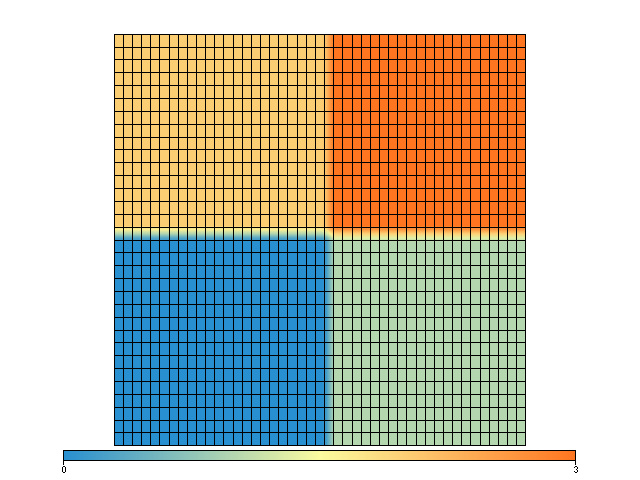

In [ ]:
# note that we have not synced the shadow space... do that now
meshvar.syncronise()
fig.show()

### Underworld2 Swarm Decomposition

[output:0]


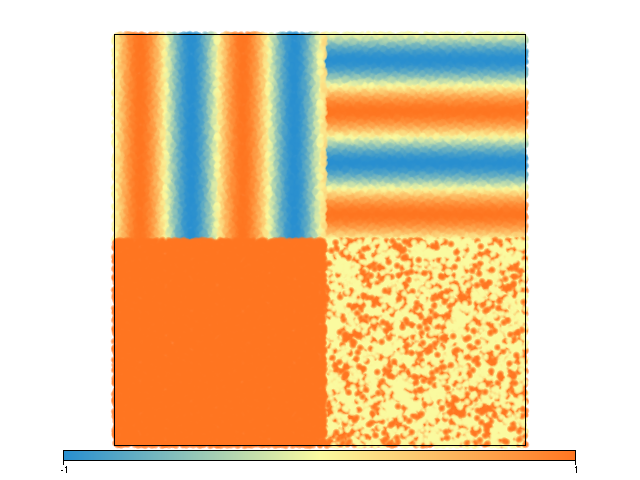

In [ ]:
# add a swarm and populate
swarm = uw.swarm.Swarm(mesh)
swarm.populate_using_layout(uw.swarm.layouts.PerCellSpaceFillerLayout(swarm,20))
swarmvar = swarm.add_variable('float',1)
# set something different on each proc!
if uw.rank() == 0:
    swarmvar.data[:] = 1
elif uw.rank() == 1:
    swarmvar.data[:] = 0
    swarmvar.data[::3] = 1
elif uw.rank() == 2:
    import numpy as np
    swarmvar.data[:,0] = np.sin(np.pi*8.*swarm.particleCoordinates.data[:,0])
elif uw.rank() == 3:
    import numpy as np
    swarmvar.data[:,0] = np.sin(np.pi*8.*swarm.particleCoordinates.data[:,1])
fig = glucifer.Figure()
fig.append(glucifer.objects.Points(swarm,swarmvar,pointSize=8.))
fig.show()

In [ ]:
# Now disable parallel execution
%autopx

%autopx disabled
